In [2]:
%load_ext autoreload
%autoreload 2

import datajoint as dj

dj.config["display.limit"] = 50
dj.config["enable_python_native_blobs"] = True

dj.config['nnfabrik.schema_name'] = "nnfabrik_v1_tuning"

import datajoint as dj
schema = dj.schema("nnfabrik_v1_tuning")

from nnfabrik.main import *
import nnfabrik

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nnvision.tables.from_nnfabrik import TrainedModel, DataInfo

fetch_download_path = '/data/fetched_from_attach'

Connecting pawelp@134.2.168.16:3306


In [3]:
from nnvision.tables.main import Recording
from nnvision.tables.scores import TestCorrelationScore as TestCorrelationMonkey

from nndichromacy.tables.from_mei import MEISelector
from nndichromacy.tables.from_mei import TrainedEnsembleModel
from nndichromacy.tables.from_mei import MEIMethod
from nndichromacy.tables.from_mei import MEISeed
from nndichromacy.tables.from_mei import TrainedEnsembleModel
from nndichromacy.tables.scores import TestCorrelation as TestCorrelationMouse

from mei import mixins

In [4]:
@schema
class MEIMonkey(mixins.MEITemplateMixin, dj.Computed):
    """MEI table template.

    To create a functional "MEI" table, create a new class that inherits from this template and decorate it with your
    preferred Datajoint schema. Next assign your trained model (or trained ensemble model) and your selector table to
    the class variables called "trained_model_table" and "selector_table". By default, the created table will point to
    the "MEIMethod" table in the Datajoint schema called "nnfabrik.main". This behavior can be changed by overwriting
    the class attribute called "method_table".
    """

    trained_model_table = TrainedEnsembleModel
    selector_table = Recording.Units
    method_table = MEIMethod
    seed_table = MEISeed

In [36]:
(MEIMonkey() & dict(data_key='3631807112901')).fetch('score', 'unit_id', as_dict=True)

[{'unit_id': 1, 'score': 1.66545},
 {'unit_id': 2, 'score': 8.00146},
 {'unit_id': 3, 'score': 9.78509},
 {'unit_id': 4, 'score': 3.14029},
 {'unit_id': 5, 'score': 0.925795},
 {'unit_id': 6, 'score': 8.3078},
 {'unit_id': 7, 'score': 6.18287},
 {'unit_id': 8, 'score': 4.91312},
 {'unit_id': 9, 'score': 3.83982},
 {'unit_id': 10, 'score': 3.18181},
 {'unit_id': 11, 'score': 6.34122},
 {'unit_id': 12, 'score': 6.39228},
 {'unit_id': 13, 'score': 2.35168},
 {'unit_id': 14, 'score': 3.87615},
 {'unit_id': 15, 'score': 4.56155},
 {'unit_id': 16, 'score': 1.19975},
 {'unit_id': 17, 'score': 7.52641},
 {'unit_id': 18, 'score': 3.55715},
 {'unit_id': 19, 'score': 3.36461},
 {'unit_id': 20, 'score': 9.51082},
 {'unit_id': 21, 'score': 1.67586},
 {'unit_id': 22, 'score': 4.29583},
 {'unit_id': 23, 'score': 2.81831},
 {'unit_id': 24, 'score': 5.44619},
 {'unit_id': 25, 'score': 7.37546},
 {'unit_id': 26, 'score': 3.59412},
 {'unit_id': 27, 'score': 2.55166},
 {'unit_id': 28, 'score': 12.0018},
 

In [27]:
# let's fetch the 5 neurons with the highest test correlation
unit_key, unit_test_correlation = (TestCorrelationMonkey().Units & dict(data_key='3631807112901')).fetch("KEY", "unit_test_correlation", order_by="unit_test_correlation DESC")

In [34]:
MEIMonkey.populate(unit_key, display_progress=True, order='random', reserve_jobs=True)

100%|██████████| 28/28 [22:23<00:00, 47.99s/it]


## Plot MEIs

In [15]:
mei_paths =(MEIMonkey() & dict(data_key='3631807112901')).fetch("mei", download_path=fetch_download_path)

In [16]:
MEIs = np.stack([torch.load(path).detach().cpu().numpy().squeeze() for path in mei_paths])

In [21]:
len(MEIs)

29

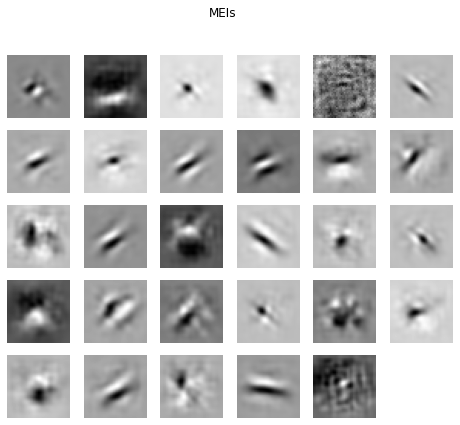

In [32]:
fig, axs = plt.subplots(5, 6, figsize=(8, 6.67))

axs.ravel()[-1].axis('off')

for i, ax in enumerate(axs.ravel()[:-1]):
    ax.imshow(MEIs[i], cmap="gray")
    ax.axis("off")
    
plt.suptitle('MEIs')
plt.savefig('meis.png', dpi=300)
plt.show()